## Introdução

O dataset que escolhemos foi “Suicide Rates Overview 1985 to 2016” e o nosso
objetivo é observar como os atributos presentes neste dataset e as relações entre eles têm
impacto no atributo suicides_no (número de suicídios). Assim, para efetuar esta análise,
usamos o ambiente miniconda.

In [1]:
'''import libraries'''
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

## Análise dos dados


### Descrição dos atributos
De forma a perceber a melhor forma de abordar o problema, começamos por
analisar as features do dataset, Assim, podemos verificar que o dataset é composto pelos
seguintes atributos:
* **country**: variável do tipo string que identifica o país analisado.
* **year**: variável do tipo int que representa o ano correspondente ao levantamento dos dados.
* **sex**: variável do tipo string que define o sexo das pessoas que cometeram suicídio.
* **age**: variável do tipo string que representa a faixa etária dos individuos que cometeram suicídio.
* **suicides_no**: variável do tipo int que corresponde ao número de suicídios ocorridos.
* **population**: variável do tipo int que define a população de um determinado país num determinado ano.
* **suicides/100k pop**: variável do tipo double que corresponde ao número de suicídios por cada 100 mil habitantes .
* **country-year**: variável do tipo string que representa o país e o ano correspondente ao levantamento de dados .
* **HDI for year**: variável do tipo double que corresponde ao índice de desenvolvimento humano.
* **gdp_for_year**: variável do tipo string que representa o grau de desenvolvimento de um país num determinado ano
* **gdp_per_capita**: variável do tipo inteiro que representa o grau de desenvolvimento de um país per capita.
* **generation**: variável do tipo string que representa a geração do conjunto de pessoas que cometeram suicidio.



In [2]:
'''Load CSV'''
df = pd.read_csv('master.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


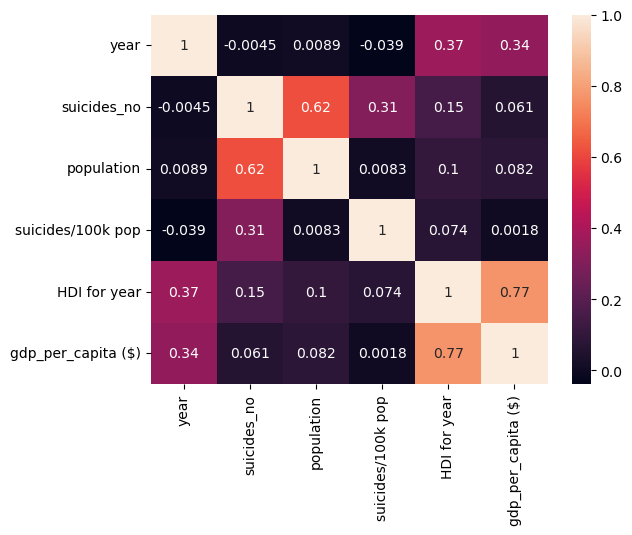

In [4]:
correlation_matrix= df[['year','suicides_no', 'population', 'suicides/100k pop', 'HDI for year', 'gdp_per_capita ($)']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

## Pré-tratamento

In [5]:
'''
Rename columns' names
'''  
df.rename(columns={" gdp_for_year ($) ": "gdp_for_year"}, inplace=True)
df.rename(columns={"gdp_per_capita ($)": "gdp_per_capita"}, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides/100k pop  27820 non-null  float64
 7   country-year       27820 non-null  object 
 8   HDI for year       8364 non-null   float64
 9   gdp_for_year       27820 non-null  object 
 10  gdp_per_capita     27820 non-null  int64  
 11  generation         27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [6]:
# Contar o número de registos repetidos
print(df['country'].duplicated().sum())

27719


In [7]:
df["gdp_for_year"] = df["gdp_for_year"].replace(",", "", regex=True)


In [8]:
df["gdp_for_year"] = df["gdp_for_year"].astype("int64")
print(df)

          country  year     sex          age  suicides_no  population  \
0         Albania  1987    male  15-24 years           21      312900   
1         Albania  1987    male  35-54 years           16      308000   
2         Albania  1987  female  15-24 years           14      289700   
3         Albania  1987    male    75+ years            1       21800   
4         Albania  1987    male  25-34 years            9      274300   
...           ...   ...     ...          ...          ...         ...   
27815  Uzbekistan  2014  female  35-54 years          107     3620833   
27816  Uzbekistan  2014  female    75+ years            9      348465   
27817  Uzbekistan  2014    male   5-14 years           60     2762158   
27818  Uzbekistan  2014  female   5-14 years           44     2631600   
27819  Uzbekistan  2014  female  55-74 years           21     1438935   

       suicides/100k pop    country-year  HDI for year  gdp_for_year  \
0                   6.71     Albania1987           

## Tratamento Outliers

<Axes: xlabel='gdp_for_year'>

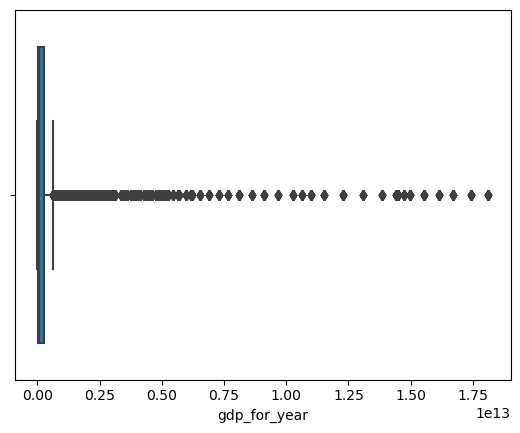

In [9]:
sns.boxplot(x=df['gdp_for_year'])

In [10]:
print("Media:")
print(np.mean(df['gdp_for_year']))
print("Desvio:")
print(np.std(df['gdp_for_year']))

Media:
445580969025.7266
Desvio:
1453583860436.8037


<Axes: >

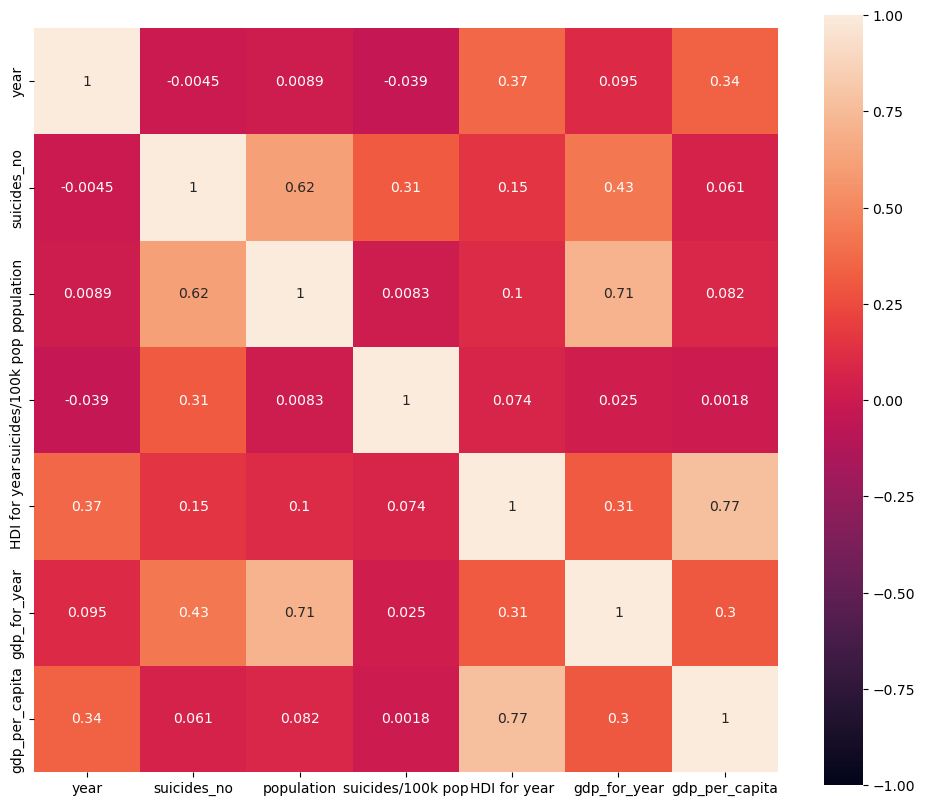

In [11]:
#Correlation depois de tratamento de dados
corr_matrix= df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square= True,annot=True)

In [12]:
'''

# Calcule os quantis desejados
q1 = df['gdp_for_year'].quantile(0.25)
q3 = df['gdp_for_year'].quantile(0.75)

# Exiba os resultados
print(f'Primeiro Quartil (Q1): {q1}')
print(f'Terceiro Quartil (Q3): {q3}')

iqr = abs(q3-q1)
min = q1 - 1.5 * iqr
max = q3 + 1.5 * iqr

# Criar um array com os outliers
outliers = np.where((df['gdp_for_year']>max) | (df['gdp_for_year']<min))

# Extrair os índices dos outliers
outlier_indices = outliers[0]


# Remover os outliers
for i in outlier_indices:
    df.drop(index=i, inplace=True)

count_drops = len(outlier_indices)
print(f'O número de registos removidos ao remover outliers é: {count_drops}')

'''

"\n\n# Calcule os quantis desejados\nq1 = df['gdp_for_year'].quantile(0.25)\nq3 = df['gdp_for_year'].quantile(0.75)\n\n# Exiba os resultados\nprint(f'Primeiro Quartil (Q1): {q1}')\nprint(f'Terceiro Quartil (Q3): {q3}')\n\niqr = abs(q3-q1)\nmin = q1 - 1.5 * iqr\nmax = q3 + 1.5 * iqr\n\n# Criar um array com os outliers\noutliers = np.where((df['gdp_for_year']>max) | (df['gdp_for_year']<min))\n\n# Extrair os índices dos outliers\noutlier_indices = outliers[0]\n\n\n# Remover os outliers\nfor i in outlier_indices:\n    df.drop(index=i, inplace=True)\n\ncount_drops = len(outlier_indices)\nprint(f'O número de registos removidos ao remover outliers é: {count_drops}')\n\n"

In [13]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers


In [14]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,4.455810e+11,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,1.453610e+12,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,4.691962e+07,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,8.985353e+09,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,4.811469e+10,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,2.602024e+11,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,1.812071e+13,126352.000000


<Axes: xlabel='gdp_for_year'>

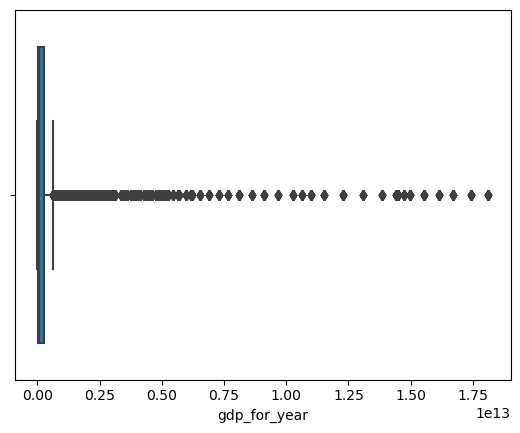

In [15]:
sns.boxplot(x=df['gdp_for_year'])

## Tratamento Missing Values

In [16]:
# Encontre as linhas onde 'HDI for year' é NaN
missing_values = df.loc[df['HDI for year'].isna(), 'country-year']

# Imprima cada valor único
unique_missing_values = missing_values.unique()
for value in unique_missing_values:
    print(value)

Albania1987
Albania1988
Albania1989
Albania1992
Albania1993
Albania1994
Albania1996
Albania1997
Albania1998
Albania1999
Albania2001
Albania2002
Albania2003
Albania2004
Albania2006
Albania2007
Albania2008
Albania2009
Antigua and Barbuda1985
Antigua and Barbuda1986
Antigua and Barbuda1987
Antigua and Barbuda1988
Antigua and Barbuda1989
Antigua and Barbuda1990
Antigua and Barbuda1991
Antigua and Barbuda1992
Antigua and Barbuda1993
Antigua and Barbuda1994
Antigua and Barbuda1995
Antigua and Barbuda1998
Antigua and Barbuda1999
Antigua and Barbuda2000
Antigua and Barbuda2001
Antigua and Barbuda2002
Antigua and Barbuda2003
Antigua and Barbuda2004
Antigua and Barbuda2005
Antigua and Barbuda2006
Antigua and Barbuda2007
Antigua and Barbuda2008
Antigua and Barbuda2009
Antigua and Barbuda2015
Argentina1986
Argentina1987
Argentina1988
Argentina1989
Argentina1991
Argentina1992
Argentina1993
Argentina1994
Argentina1996
Argentina1997
Argentina1998
Argentina1999
Argentina2001
Argentina2002
Argentina200

In [17]:
df = df.drop('HDI for year',axis=1)

In [18]:
'''Dados em Falta'''
df.isna().any()

country              False
year                 False
sex                  False
age                  False
suicides_no          False
population           False
suicides/100k pop    False
country-year         False
gdp_for_year         False
gdp_per_capita       False
generation           False
dtype: bool

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides/100k pop  27820 non-null  float64
 7   country-year       27820 non-null  object 
 8   gdp_for_year       27820 non-null  int64  
 9   gdp_per_capita     27820 non-null  int64  
 10  generation         27820 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 2.3+ MB


## Tratamento de Dados

In [20]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,2156624900,796,Boomers


In [21]:
"""
Replace each sex with a number
"""

# Crie um dicionário que mapeia cada sexo para um número
sex_to_number = {'male': 0, 'female': 1}

# Adicione a coluna "sex" ao DataFrame usando o mapeamento
df['sex'] = df['sex'].map(sex_to_number)

In [22]:
"""
Replace each country with a number
"""

unique_countries = df['country'].unique()
country_to_number = {}

iteracoes = len(unique_countries)

numeros = set()

while len(numeros) < iteracoes:
    numeros.add(np.random.randint(1, iteracoes * 21))


for i in range(len(unique_countries)):
    country_to_number[unique_countries[i]] = numeros.pop() 
    #print(f"{unique_countries[i]} : {country_to_number[unique_countries[i]]}")

# Adicione a coluna "country(to number)" ao DataFrame usando o mapeamento
df['country(to number)'] = df['country'].map(country_to_number)

# Exiba o DataFrame resultante
print(df)


          country  year  sex          age  suicides_no  population  \
0         Albania  1987    0  15-24 years           21      312900   
1         Albania  1987    0  35-54 years           16      308000   
2         Albania  1987    1  15-24 years           14      289700   
3         Albania  1987    0    75+ years            1       21800   
4         Albania  1987    0  25-34 years            9      274300   
...           ...   ...  ...          ...          ...         ...   
27815  Uzbekistan  2014    1  35-54 years          107     3620833   
27816  Uzbekistan  2014    1    75+ years            9      348465   
27817  Uzbekistan  2014    0   5-14 years           60     2762158   
27818  Uzbekistan  2014    1   5-14 years           44     2631600   
27819  Uzbekistan  2014    1  55-74 years           21     1438935   

       suicides/100k pop    country-year  gdp_for_year  gdp_per_capita  \
0                   6.71     Albania1987    2156624900             796   
1          

C:\Users\rockh\miniconda3\envs\DAA\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


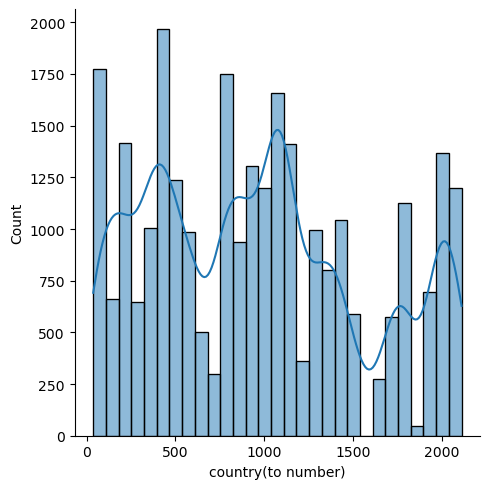

In [23]:
#create histogram with density curve overlaid
sns.displot(df['country(to number)'], kde=True, bins=29)

In [24]:
print(df['age'].unique())

['15-24 years' '35-54 years' '75+ years' '25-34 years' '55-74 years'
 '5-14 years']


In [25]:
print(len(df['year'].unique()))

32


In [26]:
gens = df['generation'].unique()
for g in gens:
    print(f'For the {g} generation we have this ages: \n')
    ages = df[df['generation'] == g]['age'].unique()
    for idade in ages:
        print(f"  {idade}\n")

For the Generation X generation we have this ages: 

  15-24 years

  5-14 years

  25-34 years

  35-54 years

For the Silent generation we have this ages: 

  35-54 years

  55-74 years

  75+ years

For the G.I. Generation generation we have this ages: 

  75+ years

  55-74 years

For the Boomers generation we have this ages: 

  25-34 years

  35-54 years

  55-74 years

For the Millenials generation we have this ages: 

  5-14 years

  15-24 years

  25-34 years

For the Generation Z generation we have this ages: 

  5-14 years



In [27]:
df = df.drop('generation',axis=1)

In [28]:
"""
Replace each age with a number
"""
age_to_number = {'5-14 years':0,
                '15-24 years':1,
                '25-34 years':2,
                '35-54 years':3,
                '55-74 years':4,
                '75+ years':5}

# Adicione a coluna "age" ao DataFrame usando o mapeamento
df['age'] = df['age'].map(age_to_number)

In [29]:
"""
Remove as colunas country-year e country
"""
df = df.drop(['country-year','country'], axis=1)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                27820 non-null  int64  
 1   sex                 27820 non-null  int64  
 2   age                 27820 non-null  int64  
 3   suicides_no         27820 non-null  int64  
 4   population          27820 non-null  int64  
 5   suicides/100k pop   27820 non-null  float64
 6   gdp_for_year        27820 non-null  int64  
 7   gdp_per_capita      27820 non-null  int64  
 8   country(to number)  27820 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 1.9 MB


In [31]:
df.describe()

,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,country(to number)
count,27820.000000,27820.000000,27820.000000,27820.000000,2.782000e+04,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,2001.258375,0.500000,2.502876,242.574407,1.844794e+06,12.816097,4.455810e+11,16866.464414,968.482171
std,8.469055,0.500009,1.706730,902.047917,3.911779e+06,18.961511,1.453610e+12,18887.576472,602.154107
min,1985.000000,0.000000,0.000000,0.000000,2.780000e+02,0.000000,4.691962e+07,251.000000,37.000000
25%,1995.000000,0.000000,1.000000,3.000000,9.749850e+04,0.920000,8.985353e+09,3447.000000,420.000000
50%,2002.000000,0.500000,3.000000,25.000000,4.301500e+05,5.990000,4.811469e+10,9372.000000,941.000000
75%,2008.000000,1.000000,4.000000,131.000000,1.486143e+06,16.620000,2.602024e+11,24874.000000,1374.000000
max,2016.000000,1.000000,5.000000,22338.000000,4.380521e+07,224.970000,1.812071e+13,126352.000000,2113.000000


In [32]:
#min_max_scaler_pop = preprocessing.MinMaxScaler(feature_range=(0,1))
#df[['population']] = min_max_scaler_pop.fit_transform(df[['population']])

#min_max_scaler_gdp_for_year = preprocessing.MinMaxScaler(feature_range=(0,1))
#df[['gdp_for_year']] = min_max_scaler_gdp_for_year.fit_transform(df[['gdp_for_year']])

#min_max_scaler_gdp_for_year = preprocessing.MinMaxScaler(feature_range=(0,1))
#df[['gdp_per_capita']] = min_max_scaler_gdp_for_year.fit_transform(df[['gdp_per_capita']])

<Axes: >

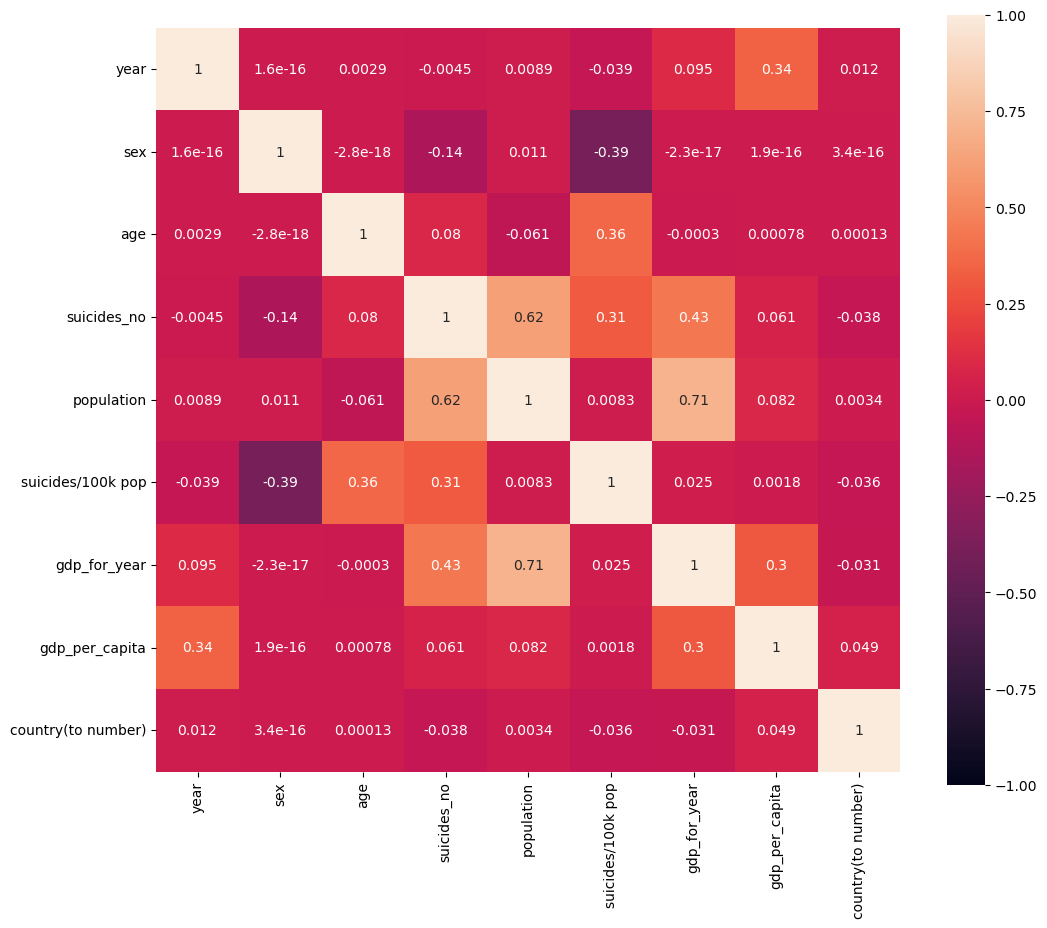

In [33]:
#Correlation depois de tratamento de dados
corr_matrix= df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square= True,annot=True)

## Treino de um Modelo de Regressão Linear (C/ Cross-Validation)

In [34]:
#X_cv = df[['sex','population','suicides/100k pop','country(to number)']]
X_cv = df[['population','suicides/100k pop','gdp_per_capita']]
y_cv = df['suicides_no']

### Separação dos dados de teste

In [35]:
'''kf = KFold(n_splits=10, shuffle=True, random_state=2023)'''

'kf = KFold(n_splits=10, shuffle=True, random_state=2023)'

### Criação e treino do Modelo

In [36]:
#Treino
lm_cv = LinearRegression()

In [37]:
'''r2_scores_cv = []

for train_cv_index, test_cv_index in kf.split(X_cv):
    X_train_cv, X_test_cv = X_cv.iloc[train_cv_index], X_cv.iloc[test_cv_index]
    y_train_cv, y_test_cv = y_cv.iloc[train_cv_index], y_cv.iloc[test_cv_index]

    lm_cv.fit(X_train_cv, y_train_cv)
    y_pred_cv = lm_cv.predict(X_test_cv)
    r2_cv = r2_score(y_test_cv, y_pred_cv)
    r2_scores_cv.append(r2_cv)'''

cross_val_results = cross_val_score(lm_cv, X_cv, y_cv, cv=2, scoring='r2')

### Avaliação do Modelo

In [38]:
'''
# Imprimir os resultados da validação cruzada
print("Resultados da Validação Cruzada:")
print("R-squared para cada fold:", r2_scores_cv)
print("Média R-squared:", np.mean(r2_scores_cv))
'''

print("Cross-Validation Results:", cross_val_results)
print("Average R-squared:", np.mean(cross_val_results))

Cross-Validation Results: [0.36438902 0.42641927]
Average R-squared: 0.3954041436529155
